In [4]:
import os
import sys
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])
utilities_dir = str(curr_dir.parent)

if utilities_dir not in sys.path:
	sys.path.append(utilities_dir)

print(utilities_dir)

/eos/home-k/kaanders/SWAN_projects/lhcdata-signal-monitoring


                                     U_QS0
2018-06-07 14:35:50.692000+02:00 -0.003297
2018-06-07 14:35:50.694000+02:00 -0.000367
2018-06-07 14:35:50.696000+02:00 -0.000245
2018-06-07 14:35:50.698000+02:00 -0.000245
2018-06-07 14:35:50.700000+02:00 -0.000245
2018-06-07 14:35:50.702000+02:00 -0.000245
2018-06-07 14:35:50.704000+02:00 -0.000245
2018-06-07 14:35:50.706000+02:00 -0.000245
2018-06-07 14:35:50.708000+02:00 -0.000245
2018-06-07 14:35:50.710000+02:00 -0.000245
2018-06-07 14:35:50.712000+02:00 -0.000245
2018-06-07 14:35:50.714000+02:00 -0.000245
2018-06-07 14:35:50.716000+02:00 -0.000245
2018-06-07 14:35:50.718000+02:00 -0.000245
2018-06-07 14:35:50.720000+02:00 -0.000245
2018-06-07 14:35:50.722000+02:00 -0.000123
2018-06-07 14:35:50.724000+02:00 -0.000245
2018-06-07 14:35:50.726000+02:00 -0.000245
2018-06-07 14:35:50.728000+02:00 -0.000245
2018-06-07 14:35:50.730000+02:00 -0.000245
2018-06-07 14:35:50.732000+02:00 -0.000245
2018-06-07 14:35:50.734000+02:00 -0.000245
2018-06-07 

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev3python3/Fri/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/cvmfs/sft-nightlies.cern.ch/lcg/views/dev3python3/Fri/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


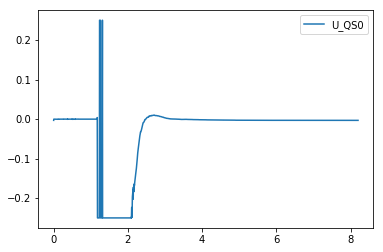

In [20]:

import pandas as pd
import numpy as np
%matplotlib inline

from utilities.post_mortem import signalPM_modified as s
from utilities.signal_influx import signal as sig
system = 'QPS'
className = 'DQAMCNMB_PMSTD'
source = 'A22R3'
signal = 'U_QS0'

sPM = s.Signal(system, className, source, signal, 1528374951890000000).parseSignal()

# response = requests.get(
# 	"http://pm-api-pro/v2/pmdata/signal?system=QPS&className=DQAMCNMB_PMSTD&source=A22R3&timestampInNanos=1528374951890000000&signal=U_QS0")

time = sPM.getTime()

time[:]= [pd.Timestamp(t, tz='Europe/Zurich') for t in time]

voltage = sPM.getValue()

df = pd.DataFrame(voltage, time, columns=['U_QS0'])
print(df)
U_QS0_write = sig.Signal(df,'U_QS0')
print(U_QS0_write.df)
U_QS0_write.write()

U_QS0_read = sig.Signal(label_='U_QS0')
U_QS0_read.read()

df = U_QS0_read.df
newIndex = df.index.astype(np.int64).tolist()
newIndex[:] = [t / 1e9 - newIndex[0] / 1e9 for t in newIndex]
df.set_index([newIndex], inplace=True)


df.plot()
